In [1]:
import larcv
import os,sys,json
print(os.listdir("./data/"))
import h5py

%matplotlib inline

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

['merged_beam_0.h5', 'Untitled1.ipynb', 'Untitled.ipynb', 'merged_beam_0.pkl', 'look_hdf5_files.ipynb', 'merged_sample_0.h5', 'voxel_occupancy.ipynb', 'read_pickle.ipynb', 'convert_to_pkl.ipynb', '.ipynb_checkpoints', 'test_torch.ipynb']


In [2]:
f = "./data/merged_beam_0.h5"
io = larcv.IOManager()
io.add_in_file(f)
io.initialize()

    [NORMAL]  <IOManager::prepare_input> Opening a file in READ mode: "./data/merged_beam_0.h5"
    [NORMAL]  <IOManager::prepare_input> File "./data/merged_beam_0.h5" has 479 entries
    [NORMAL]  <IOManager::initialize> Prepared input with 479 entries...


True

In [3]:
tot_entries= io.get_n_entries()

for i in range(10):
    tensor3d = io.get_data("sparse3d","dunevoxels")
    print(tensor3d)
    tensor_v = tensor3d.sparse_tensor(0)
    print(tensor_v)

In [4]:
entry_data = io.get_data("sparse3d","dunevoxels")

In [5]:
prod_list = io.producer_list("particle") #check for other producer list
print(prod_list)

['all', 'cpiID', 'duneseg', 'neutID', 'neutrino', 'npiID', 'protID', 'segment']


### Other producer list are particle, sparse2d, sparse3d, cluster2d,cluster3d 
#### comes from the HDF5 naming scheme apparently...for example contents of this file are:

"""
Data
Data/cluster2d_duneseg_group
Data/cluster2d_duneseg_group/cluster_extents
Data/cluster2d_duneseg_group/extents
Data/cluster2d_duneseg_group/image_meta
Data/cluster2d_duneseg_group/projection_extents
Data/cluster2d_duneseg_group/voxels
Data/cluster2d_segment_group
Data/cluster2d_segment_group/cluster_extents
Data/cluster2d_segment_group/extents
Data/cluster2d_segment_group/image_meta
Data/cluster2d_segment_group/projection_extents
Data/cluster2d_segment_group/voxels
Data/cluster3d_segment_group
Data/cluster3d_segment_group/cluster_extents
Data/cluster3d_segment_group/extents
Data/cluster3d_segment_group/image_meta
Data/cluster3d_segment_group/projection_extents
Data/cluster3d_segment_group/voxels
Data/particle_all_group
Data/particle_all_group/extents
Data/particle_all_group/particles
Data/particle_cpiID_group
Data/particle_cpiID_group/extents
Data/particle_cpiID_group/particles
Data/particle_duneseg_group
Data/particle_duneseg_group/extents
Data/particle_duneseg_group/particles
Data/particle_neutID_group
Data/particle_neutID_group/extents
Data/particle_neutID_group/particles
Data/particle_neutrino_group
Data/particle_neutrino_group/extents
Data/particle_neutrino_group/particles
Data/particle_npiID_group
Data/particle_npiID_group/extents
Data/particle_npiID_group/particles
Data/particle_protID_group
Data/particle_protID_group/extents
Data/particle_protID_group/particles
Data/particle_segment_group
Data/particle_segment_group/extents
Data/particle_segment_group/particles
Data/sparse2d_dunevoxels_group
Data/sparse2d_dunevoxels_group/extents
Data/sparse2d_dunevoxels_group/image_meta
Data/sparse2d_dunevoxels_group/voxel_extents
Data/sparse2d_dunevoxels_group/voxels
Data/sparse3d_dunevoxels_group
Data/sparse3d_dunevoxels_group/extents
Data/sparse3d_dunevoxels_group/image_meta
Data/sparse3d_dunevoxels_group/voxel_extents
Data/sparse3d_dunevoxels_group/voxels

"""

In [6]:
dat_pid = io.get_data("particle","neutrino")

In [7]:
print(dat_pid)

In [8]:
attributes=dir(larcv.EventParticle)
for attr in attributes:
    print(attr)

__class__
__delattr__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
append
as_vector
at
clear
set
size


In [9]:
dat_pidv = dat_pid.as_vector()

In [10]:
print(dat_pidv)

In [11]:
attributes=dir(larcv.Particle) #dir(larcv.VectorOfParticle)
for attr in attributes:
    print(attr)
    

__class__
__delattr__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
ancestor_pdg_code
ancestor_position
ancestor_t
ancestor_track_id
ancestor_x
ancestor_y
ancestor_z
as_array
creation_process
distance_travel
dump
end_position
energy_deposit
energy_init
first_step
id
last_step
mcst_index
mct_index
momentum
nu_current_type
nu_interaction_type
p
parent_pdg_code
parent_position
parent_t
parent_track_id
parent_x
parent_y
parent_z
pdg_code
position
px
py
pz
shape
t
track_id
x
y
z


In [12]:
import pandas,numpy
def ConvertToPandas(io):
    df = pandas.DataFrame(
        index = numpy.arange(io.get_n_entries() - 1),
        columns = ["id","parent_pdg_code","pdg_code","px","py","pz","x","y","z","energy_deposit"])
    for i in range(io.get_n_entries()):
        io.read_entry(i)
        p_neut = io.get_data("particle","neutrino")
        
        if i!=0:
            df.iloc[i-1]["id"] =  p_neut.at(0).id()
            df.iloc[i-1]["parent_pdg_code"] =  p_neut.at(0).parent_pdg_code()
            df.iloc[i-1]["px"] = p_neut.at(0).px()
            df.iloc[i-1]["py"] = p_neut.at(0).py()
            df.iloc[i-1]["pz"] = p_neut.at(0).pz()
            df.iloc[i-1]["x"] = p_neut.at(0).x()
            df.iloc[i-1]["y"] = p_neut.at(0).y()
            df.iloc[i-1]["z"] = p_neut.at(0).z()
            df.iloc[i-1]["pdg_code"] = p_neut.at(0).pdg_code()
            df.iloc[i-1]["energy_deposit"] = p_neut.at(0).energy_deposit()
    return df



In [13]:
df = ConvertToPandas(io)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 477
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               478 non-null    object
 1   parent_pdg_code  478 non-null    object
 2   pdg_code         478 non-null    object
 3   px               478 non-null    object
 4   py               478 non-null    object
 5   pz               478 non-null    object
 6   x                478 non-null    object
 7   y                478 non-null    object
 8   z                478 non-null    object
 9   energy_deposit   478 non-null    object
dtypes: object(10)
memory usage: 41.1+ KB


In [15]:
df

,id,parent_pdg_code,pdg_code,px,py,pz,x,y,z,energy_deposit
0,0,0,14,0.0,0.44154,4.349824,180.872059,-78.079412,277.379911,0.0
1,0,0,14,0.0,0.373464,3.679174,8.780521,50.040788,411.296672,0.0
2,0,0,14,0.0,0.383773,3.780732,24.517491,-30.450335,44.053124,0.0
3,0,0,14,0.0,0.711104,7.005426,184.403992,-41.203742,12.066716,0.0
4,0,0,14,0.0,0.132245,1.30281,236.843441,-99.1466,424.580508,0.0
...,...,...,...,...,...,...,...,...,...,...
473,0,0,14,0.0,0.331365,3.264436,225.606774,90.018036,341.779108,0.0
474,0,0,14,0.0,0.533293,5.253725,276.111639,-2.956377,124.591328,0.0
475,0,0,14,0.0,0.288652,2.843656,169.513058,-60.089189,156.704179,0.0
476,0,0,14,0.0,0.18934,1.865279,61.788169,-10.761954,63.569094,0.0


<Axes: xlabel='px', ylabel='py'>

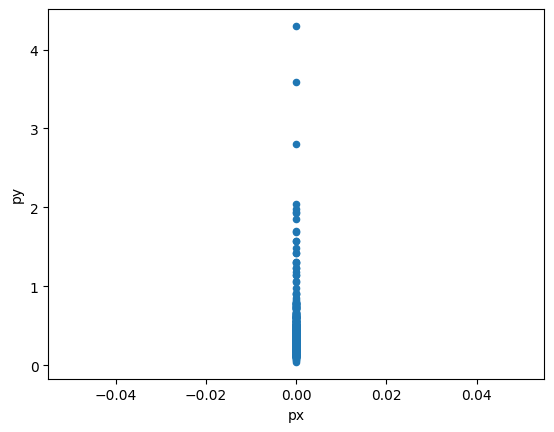

In [16]:
df.plot(x="px",y="py",kind="scatter")

Text(0, 0.5, 'Frequency')

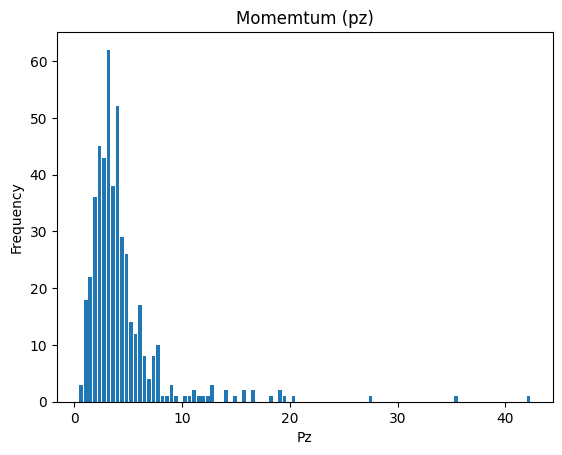

In [17]:
import matplotlib.pyplot as plt
df['pz'].plot(kind='hist', bins=100, rwidth=0.8)
plt.title('Momemtum (pz)')
plt.xlabel('Pz')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

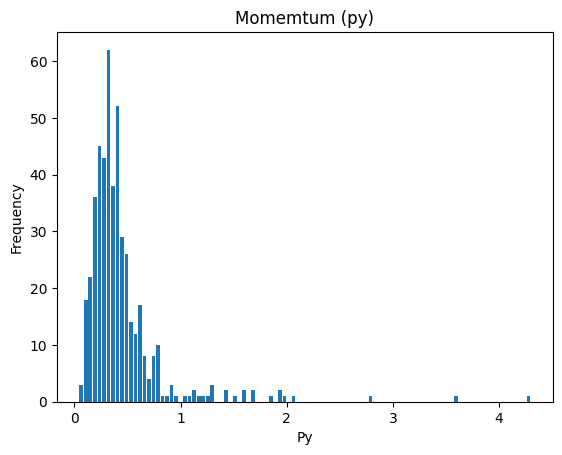

In [18]:
df['py'].plot(kind='hist', bins=100, rwidth=0.8)
plt.title('Momemtum (py)')
plt.xlabel('Py')
plt.ylabel('Frequency')

In [19]:
dune_voxels = io.producer_list("sparse3d") #check for other producer list


In [20]:
io.read_entry(1)
image3d = io.get_data("sparse3d","dunevoxels")
sparse = image3d.sparse_tensor(0)

In [21]:
v = sparse.as_vector()

In [22]:
print(len(v))

1445


In [23]:
for i in range(0,10):
    print(v[i].value())

1.783132791519165
0.7506603002548218
0.5902842879295349
0.7848303318023682
1.133880376815796
0.7361549735069275
0.6989262700080872
0.6638954877853394
0.5334653854370117
0.623958945274353


<Axes: xlabel='x', ylabel='y'>

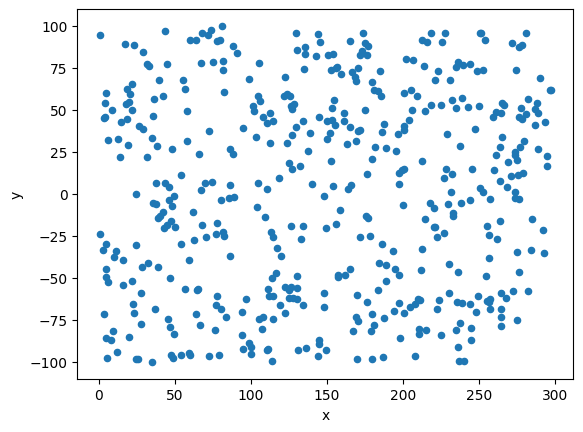

In [24]:
df.plot(x="x",y="y",kind="scatter")

## Make sure that values 'x' and 'y' are numeric..

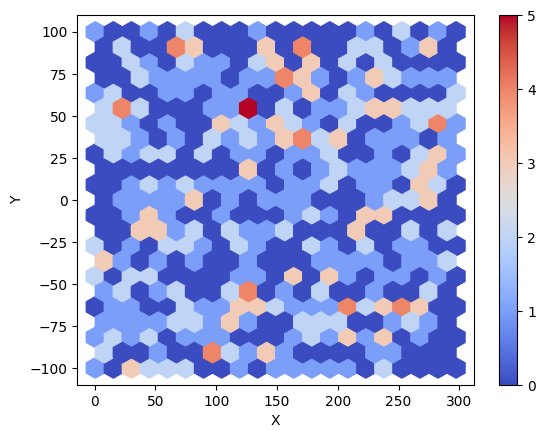

In [25]:

fdf = df[df['x']>0] #This basically means only plot if x>0. 
fdf['x'] = pandas.to_numeric(fdf['x'],errors = 'coerce')
fdf['y'] = pandas.to_numeric(fdf['y'],errors = 'coerce')
fdf = fdf.dropna(subset=['x','y'])

fdf.plot.hexbin(x='x',y='y',gridsize=20,cmap='coolwarm')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

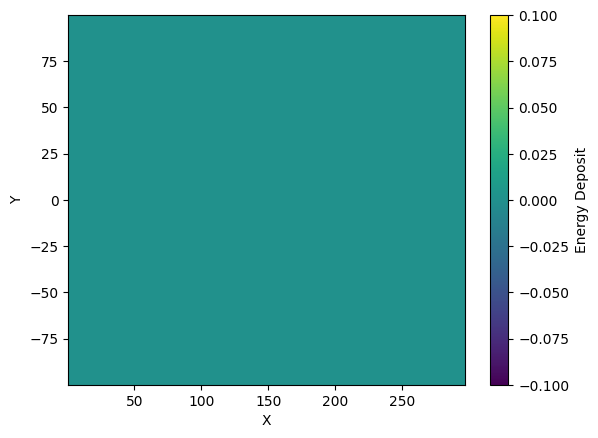

In [26]:
import matplotlib.pyplot as plt


df['x'] = pandas.to_numeric(df['x'],errors = 'coerce')
df['y'] = pandas.to_numeric(df['y'],errors = 'coerce')
df['energy_deposit'] =pandas.to_numeric(df['energy_deposit'],errors = 'coerce')

plt.hist2d(df['x'],df['y'],weights=df['energy_deposit'],bins=[50,50],cmap='viridis')
plt.colorbar(label="Energy Deposit")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [28]:
print(prod_list)

1
['all', 'cpiID', 'duneseg', 'neutID', 'neutrino', 'npiID', 'protID', 'segment']


In [30]:
for e in range(0,io.get_n_entries()):
    io.read_entry(e)
    for i in range(0,len(prod_list)):
        temp = io.get_data("particle",prod_list[i])
        #print(temp.size(),prod_list[i])
        if(prod_list[i]=="segment"):
            for j in range(0,temp.size()):
                px = temp.at(j).px()
                ed = temp.at(j).energy_deposit()
                x = temp.at(j).x()
                pdg = temp.at(j).pdg_code()
                if ed>0:
                    print("index {}, x {}, px {}, pdg {}".format(j,x,px,pdg))

          

In [31]:
attributes = dir(larcv.pylarcv.EventSparseTensor3D)
for attr in attributes:
    print(attr)

__class__
__delattr__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
as_vector
at
clear
set
size
sparse_tensor
